# k近邻算法
## 一、kNN算法的特点
1. 思想极度简单
- 应用的数学知识几乎为零
- 效果很好
- 可以解释机器学习算法使用过程中很多细节问题
- 本节将借助kNN更完整地刻画了机器学习应用的流程

## 二、kNN的原理
**kNN解决的是监督学习中的分类问题，但是也可以解决回归问题**
原理：利用相邻k个点的距离计算出给定的点属于哪个类别

例子：我们定义以下数据集：raw_data_X为特征矩阵，raw_data_y为类别矩阵
## 三、 kNN的过程
1. 特征点的距离计算使用欧拉距离进行计算</br>
平面内的欧拉距离：$$Euler=\sqrt{(X^{(a)} - X^{(b)})^2 + (y^{(a)} - y^{(b)})^2}$$</br>
当然，经过多维扩展后，我们可以得到最终的欧拉公式：</br>
定义：X表示整个特征数据矩阵，上标代表某个样本，下标代表维度，假设特征向量有N个维度
$$Euler = \sqrt{\sum_{i=1}^{n}(X^{(a)}_{i} - X^{(b)}_{i})^2}$$
2. 得到距离后，我们要计算出距离最近的k个点分别对应的矩阵中的索引
3. 在给定的k中把nearest的值取出来
4. 计算不同类别的点可以有多少个
**通过以下可以看到，kNN算法是一个不需要训练过程的算法，但是我们为了统一，可以认为训练数据集本身就是模型**

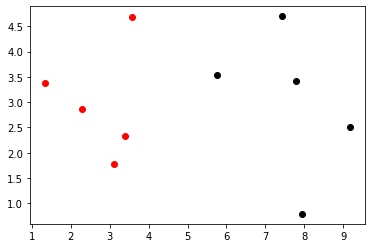

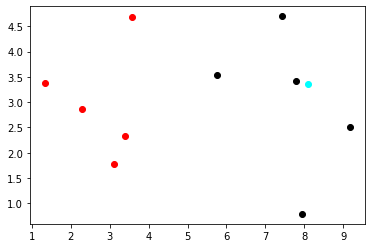

In [1]:
import numpy as np
from matplotlib import pyplot as plt

raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
              ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="red")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="black")
plt.show()
x = np.array([8.093607318, 3.365731514])
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="red")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="black")
plt.scatter(x[0], x[1], color="cyan")
plt.show()

In [2]:
"""kNN的过程"""

from math import sqrt

distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]
nearest = np.argsort(distances)
k = 6
topK_y = y_train[nearest[:k]]
topK_y

array([1, 1, 1, 1, 1, 0])

In [3]:
from collections import Counter
votes = Counter(topK_y)
print(votes)
print(type(votes))
votes.most_common(1)
predict_y = votes.most_common(1)[0][0]
predict_y

Counter({1: 5, 0: 1})
<class 'collections.Counter'>


1

In [4]:
# sklearn实现kNN分类算法
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=6)
sklearn_knn.fit(X=X_train,y=y_train)
X_predict = x.reshape(1,-1)  # 对于一个1维的向量，我们必须传入行列式！！
sklearn_knn.predict(X_predict)

array([1])

# 使用自己编写的库实现

In [5]:
import neighbors
sw_knn = neighbors.KNeighborsClassifier(n_neighbors=6)
sw_knn.fit(X_train,y_train)
sw_knn.predict(X_predict=X_predict)

array([1])